<a href="https://colab.research.google.com/github/AadeshVarude/Controls-and-Vision-algortihms-for-Humanoid-robot/blob/main/Controls/biped_walking_multistep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook is for the calculation of the COM trajectory and end effector of swing leg trajectory for the multiple step of biped walkig using 3DLIPM

In [ ]:
from math import pi ,sin 
import math 
#cvp stands for cosign velocity profile
def cvp( x0 ,xf , tf,t0):
    l = (xf -x0)/tf
    w = (2*pi)/tf

    t = 0
    dt = tf/100
    t_data = []

    x_data = []

    while t <= tf+dt :

        x = l*t + x0 - ( l* sin(w*t) /w)
        x_data.append(x)
        t_data.append(t+t0)
        t += dt
    return x_data , t_data

In [ ]:
# The COM Trajectory
import math as m 
def com_traj(ti,td,x0,xf,y0,yf):

  g= 9.8
  zc=0.28
  Tc=m.sqrt(zc/g)

  C = m.cosh(td/Tc)
  S = m.sinh(td/Tc)

  x0_dot = (xf - x0*C)/(Tc*S)
  y0_dot = (yf - y0*C)/(Tc*S)
  
  t = 0
  dt = td/100

  t_com = []
  y_com = []
  x_com = []
  z_com = []
  while t <= td+dt:
    x=(x0*m.cosh((t/Tc)) ) + (Tc*x0_dot*m.sinh((t/Tc)))
    y=(y0*m.cosh((t/Tc)) ) + (Tc*y0_dot*m.sinh((t/Tc)))
    y_com.append(y)
    x_com.append(x)
    t_com.append(t+(ti))
    z_com.append(zc)
    t+=dt
#   if x0==xf:
#     x_com = cvp( x0 ,xf , td,ti)
#   if ti == 0:
#     y_com = cvp( y0 ,yf , td,ti)

  return z_com, y_com ,x_com , t_com 

def com_traj2(ti,td,x0,xf,y0,yf):

    g= 9.8
    zc=0.28

    x_com ,t_com = cvp( x0 ,xf , td,ti)
    y_com ,t_com = cvp( y0 ,yf , td,ti)

    z_com = [ zc for _ in range(len(t_com)) ]
    return z_com, y_com ,x_com , t_com 


def const_x( ti,td,x ):
    t = 0
    dt = td/100
    t_com = []

    x_com = []

    while t <= td+dt :

        x_com.append(x)
        t_com.append(t+ti)
        t += dt
    return x_com 




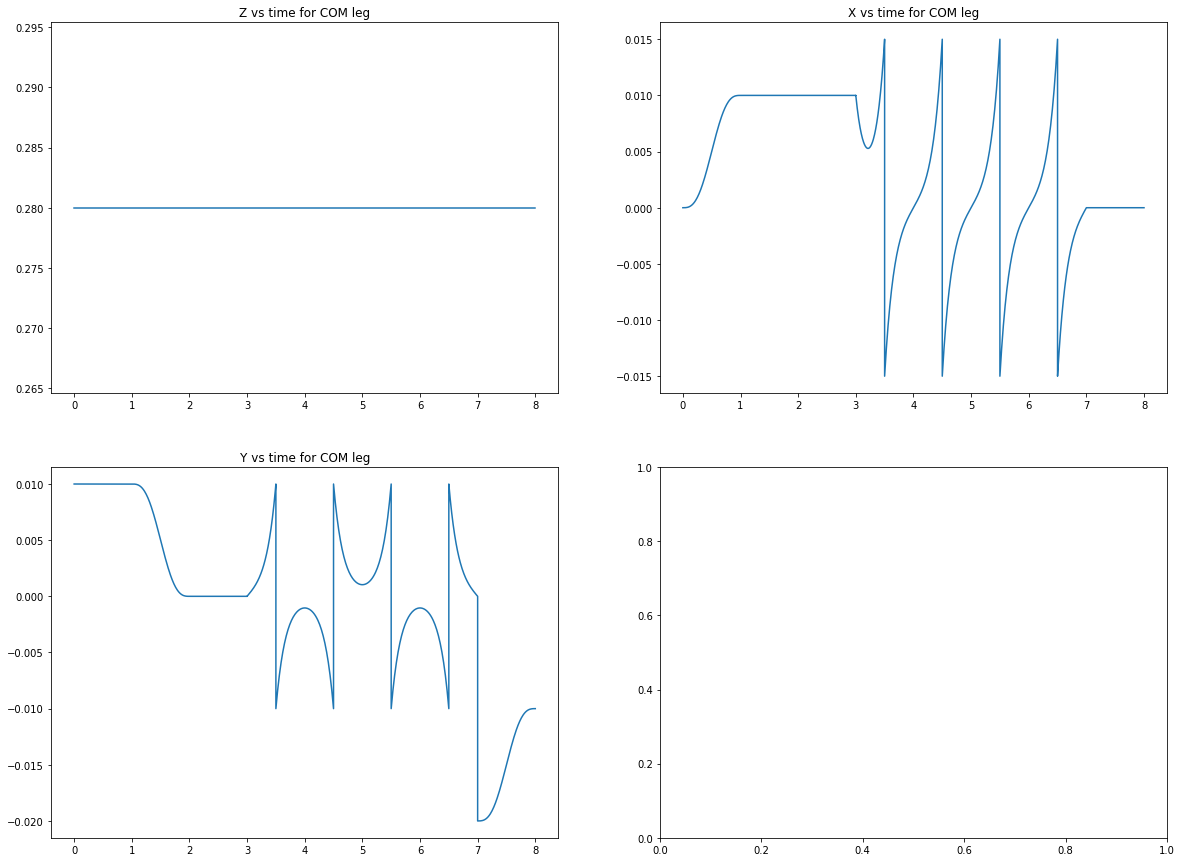

In [ ]:
z_com=[]
y_com=[]
x_com=[]
t_com=[]
z_com1, y_com1 , x_com1,t_com1 =com_traj2(0,1,0,0.01,0.01,0.01)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj2(1,1,0.01,0.01,0.01,0.0)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj2(2,1,0.01,0.01,0.0,0.0)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj(3,0.5,0.01,0.015,0.0,0.01)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj(3.5,1,-0.015,0.015,-0.01,-0.01)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj(4.5,1,-0.015,0.015,0.01,0.01)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj(5.5,1,-0.015,0.015,-0.01,-0.01)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj(6.5,0.5,-0.015,0,0.01,0)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj2(7,1,0,0.0,-0.02,-0.01)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)



import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for COM leg")
axes[0,0].plot(t_com   , z_com) 
axes[0,1].set_title("X vs time for COM leg")
axes[0,1].plot(t_com   , x_com) 
axes[1,0].set_title("Y vs time for COM leg")
axes[1,0].plot(t_com   , y_com) 
plt.show()

In [ ]:
import numpy as np

def bezier( x0 ,xd0 ,xf ,xdf ,tf):

    p = np.array( [
                   [1,0,0,0],
                   [0,1,0,0],
                   [1,tf,tf**2 ,tf**3],
                   [ 0, 1 ,2*tf, 3*(tf**2)]
    ])

    p = np.linalg.inv(p)
    p=p.round(2)
    q = np.array([x0 ,xd0 ,xf ,xdf]).T

    a=np.dot( p,q)
    a=list(a)
    return a


def full_step_up_down(tf,t0):
  x0 ,xd0 ,xf ,xdf  = 0  ,0.0, 0.02 , 0.0 
  a1=bezier( x0 ,xd0 ,xf ,xdf ,tf*0.2)
  x0 ,xd0 ,xf ,xdf  = 0.02  ,0.0, 0.02 , 0.0 
  a2=bezier( x0 ,xd0 ,xf ,xdf ,tf*0.6)
  x0 ,xd0 ,xf ,xdf  = 0.02  ,0.0, 0.0 , 0.0 
  a3=bezier( x0 ,xd0 ,xf ,xdf ,tf*0.2)
  t = 0
  dt = tf/100
  t_data = []
  z_data = []
  while t <= tf+dt :
    if (t<=tf*0.2):
      z = a1[0] + a1[1]*t + a1[2]*(t**2)+ a1[3]*(t**3)
    if (tf*0.2<t<=tf*0.8):
      z = a2[0] + a2[1]*(t-(tf*0.2)) + a2[2]*((t-(tf*0.2)**2))+ a2[3]*((t-(tf*0.2))**3)
    if (0.8*tf<t<=1*tf):
      z = a3[0] + a3[1]*(t-(tf*0.8)) + a3[2]*((t-(tf*0.8))**2)+ a3[3]*((t-(tf*0.8))**3)
    z_data.append(z)
    t_data.append(t+t0)
    t += dt

  return z_data, t_data
def const_z( tf,t0 ):
    t = 0
    dt = tf/100
    t_data = []

    z_data = []

    while t <= tf+dt :

        x = 0
        z_data.append(x)
        t_data.append(t+t0)
        t += dt
    return z_data , t_data
    
def const_y( y0, tf,t0 ):
    t = 0
    dt = tf/100
    
    y_data = []

    while t <= tf+dt :
        y_data.append(y0)
        t += dt
    return y_data

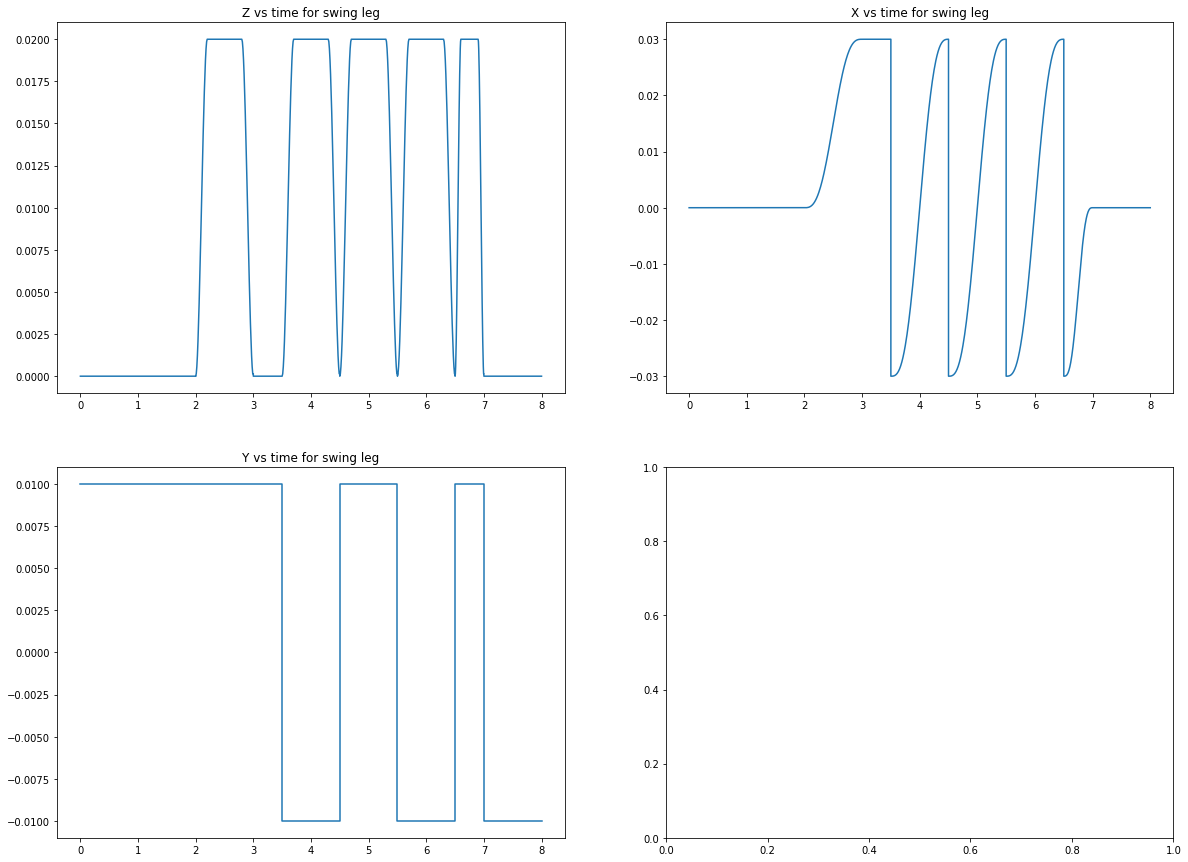

In [ ]:

import math as m
def main_call():
  t0=0
  z_data=[]
  t_data=[]

  for i in range(9):
    if t0==3:
      t0=t0
      tf=0.5
      z_data1, t_data1=const_z(tf,t0)
    elif t0==0 or t0==1 or t0==7:
      tf=1
      z_data1, t_data1=const_z(tf,t0)
    elif t0==6.5:
      tf=0.5
      z_data1, t_data1=full_step_up_down(tf,t0)
    else:
      tf=1
      z_data1, t_data1=full_step_up_down(tf,t0)
    z_data.extend(z_data1)
    t_data.extend(t_data1)
    t0=t_data1[-1] 
    t0=round(t0,2)
  x0=[0   ,   0 , 0     , 0.030 , -0.030 , -0.030 , -0.030 , -0.030 , 0   ]
  xf=[0   ,   0 , 0.030 , 0.030 ,  0.030 ,  0.030 ,  0.030 ,    0  , 0   ]
  tf=[1   ,   1 , 1    , 0.5  ,     1 ,     1 ,     1 ,   0.5 , 1   ]
  y =[0.01 , 0.01 , 0.01  , 0.01  ,  -0.01 ,   0.01 ,  -0.01 ,   0.01 , -0.01 ]
  t0=0
  x_data,t_data=[],[]
  y_data = []
  for i in range(9):
    x_data0 , t_data0 = cvp( x0[i] ,xf[i], tf[i],t0)
    y_data0 = const_y( y[i] ,tf[i],t0)
    t0+=tf[i]
    x_data.extend(x_data0)
    t_data.extend(t_data0)
    y_data.extend(y_data0)
  return x_data,y_data ,z_data,t_data


import matplotlib.pyplot as plt
x_data,y_data ,z_data,t_data = main_call()
fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for swing leg")
axes[0,0].plot(t_data   , z_data) 
axes[0,1].set_title("X vs time for swing leg")
axes[0,1].plot(t_data   , x_data) 
axes[1,0].set_title("Y vs time for swing leg")
axes[1,0].plot(t_data   , y_data) 
plt.show()


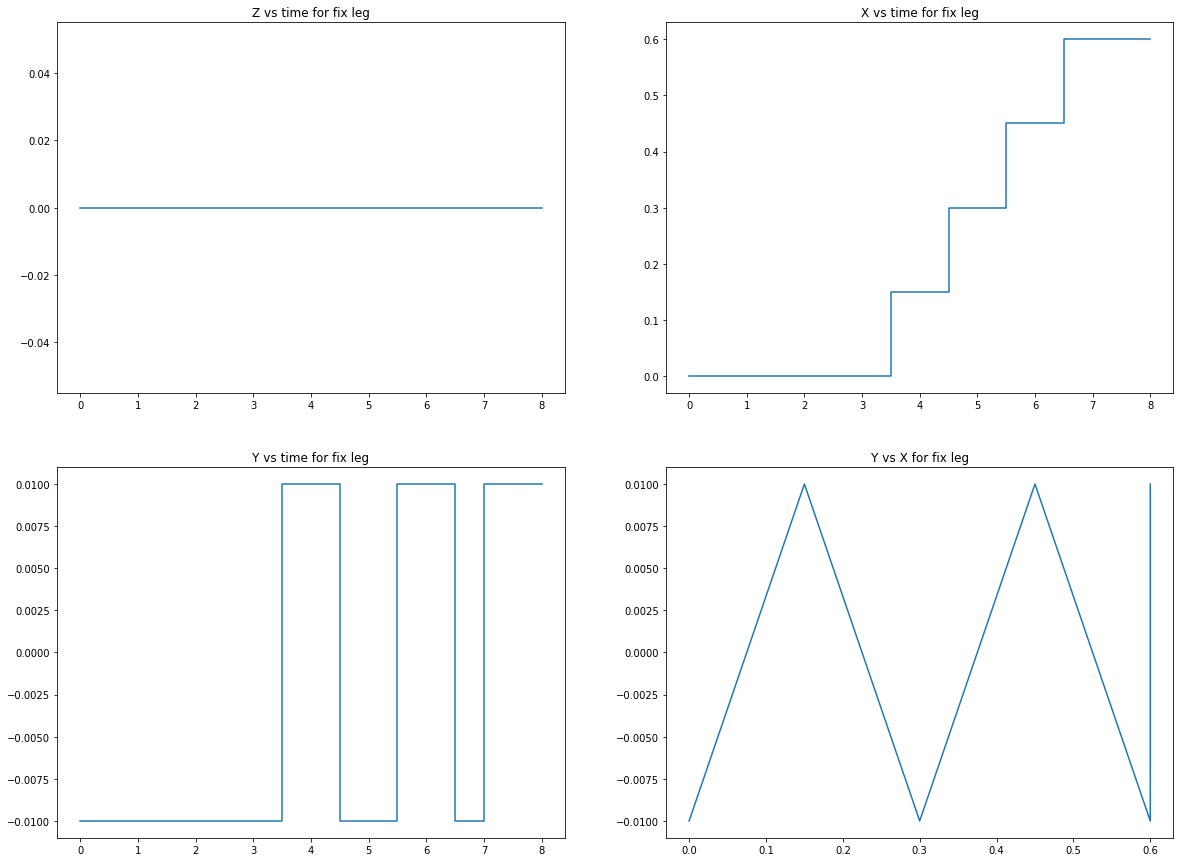

In [ ]:
# fixed leg data
def const_var( x0,y0,z0, tf,t0 ):
    t = 0
    dt = tf/100
    x_data = []
    y_data = []
    z_data = []
    t_data = []

    while t <= tf+dt :
        x_data.append(x0)
        y_data.append(y0)
        z_data.append(z0)
        t_data.append(t+t0)
        t += dt
    return x_data,y_data,z_data,t_data

def fix_leg_data():
    tf=[ 1   ,    1 ,  1   ,  0.5 ,    1 ,     1 ,    1 ,   0.5 ,     1]
    y =[-0.01, -0.01, -0.01,  -0.01, 0.01,  -0.01,   0.01,  -0.01,   0.01       ]
    z =[0   ,     0 ,    0 ,    0 ,    0 ,     0 ,    0 ,     0 ,     0]
    x =[0   ,     0 ,    0 ,    0,   0.15,  0.3 ,  0.45,   0.60,  0.60]

    t0 = 0
    xf_data ,yf_data ,zf_data = [],[],[]
    tf_data = []

    for i in range(9):
        xf_data0,yf_data0,zf_data0,tf_data0 = const_var(x[i],y[i],z[i],tf[i],t0)
        t0 += tf[i]
        xf_data.extend(xf_data0)
        tf_data.extend(tf_data0)
        yf_data.extend(yf_data0)
        zf_data.extend(zf_data0)

    return  xf_data ,yf_data ,zf_data ,tf_data
    
xf_data ,yf_data ,zf_data ,tf_data = fix_leg_data()
fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for fix leg")
axes[0,0].plot(tf_data   , zf_data) 
axes[0,1].set_title("X vs time for fix leg")
axes[0,1].plot(tf_data   , xf_data) 
axes[1,0].set_title("Y vs time for fix leg")
axes[1,0].plot(tf_data   , yf_data) 
axes[1,1].set_title("Y vs X for fix leg")
axes[1,1].plot(xf_data   , yf_data) 
plt.show()

In [ ]:
# calculating in the global coordinate system 
'''
for COM we have x_com ,y_com ,z_com
for swing lwg we have x_data ,y_data ,z_data
for fix leg we have xf_data ,yf_data,zf_data
and time is same i.e. t_com == t_data == tf_data we will use t_data

we will make a list of touple at each instace of time 

touple will consist of ( (com coordinates) , (swing leg coordinates) , (fix leg coordinate))

'''
ordinate_data = []
swing_leg_global = [ [], [] , []]
com_global = [ [] , [] , [] ]
for i in range(len(t_data)):
    com_ordinate = ( x_com[i]  + xf_data[i]  , y_com[i] + yf_data[i]  , z_com[i]  )
    sl_ordinate  = ( x_data[i] + xf_data[i]  , y_data[i]  , z_data[i] )
    fl_ordinate  = ( xf_data[i]              , yf_data[i] , zf_data[i])

    ordinate_data.append( (com_ordinate ,sl_ordinate , fl_ordinate )  )
    swing_leg_global[0].append( sl_ordinate[0])
    swing_leg_global[1].append( sl_ordinate[1])
    swing_leg_global[2].append( sl_ordinate[2])

    com_global[0].append( com_ordinate[0])
    com_global[1].append( com_ordinate[1])
    com_global[2].append( com_ordinate[2])


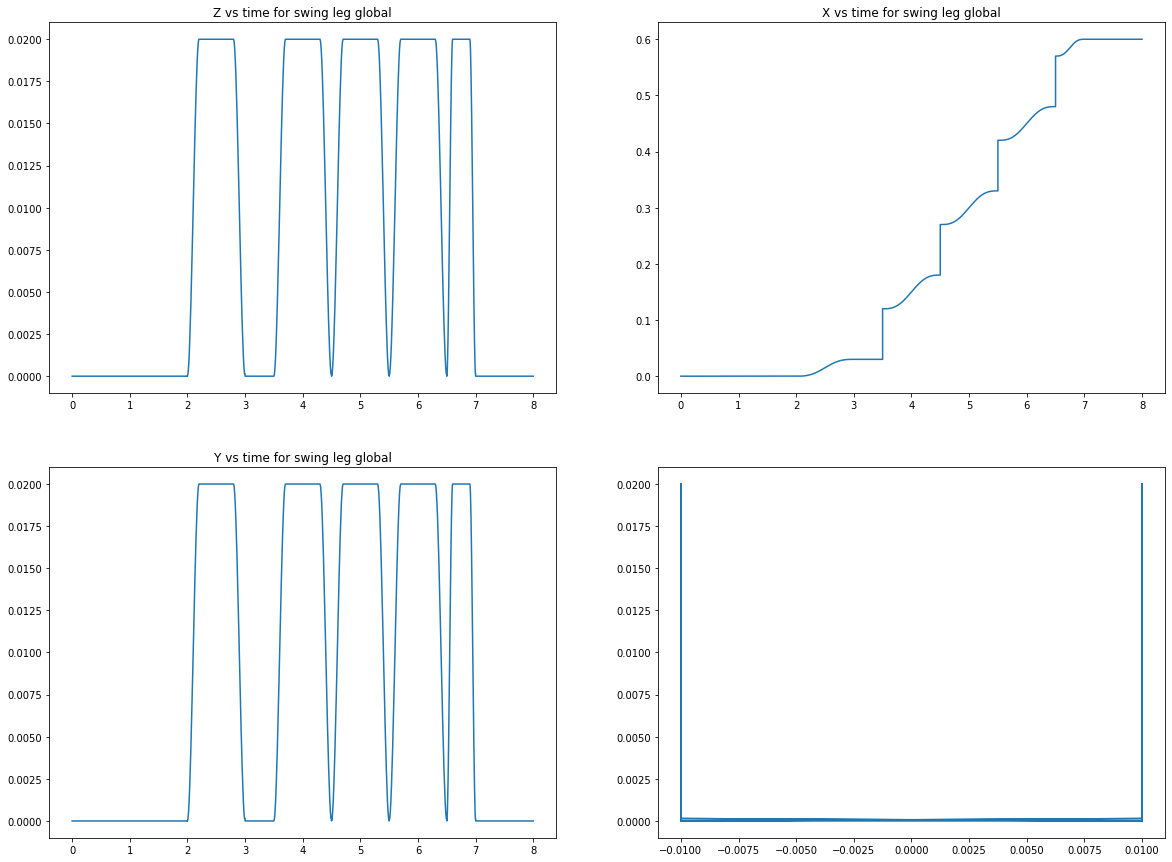

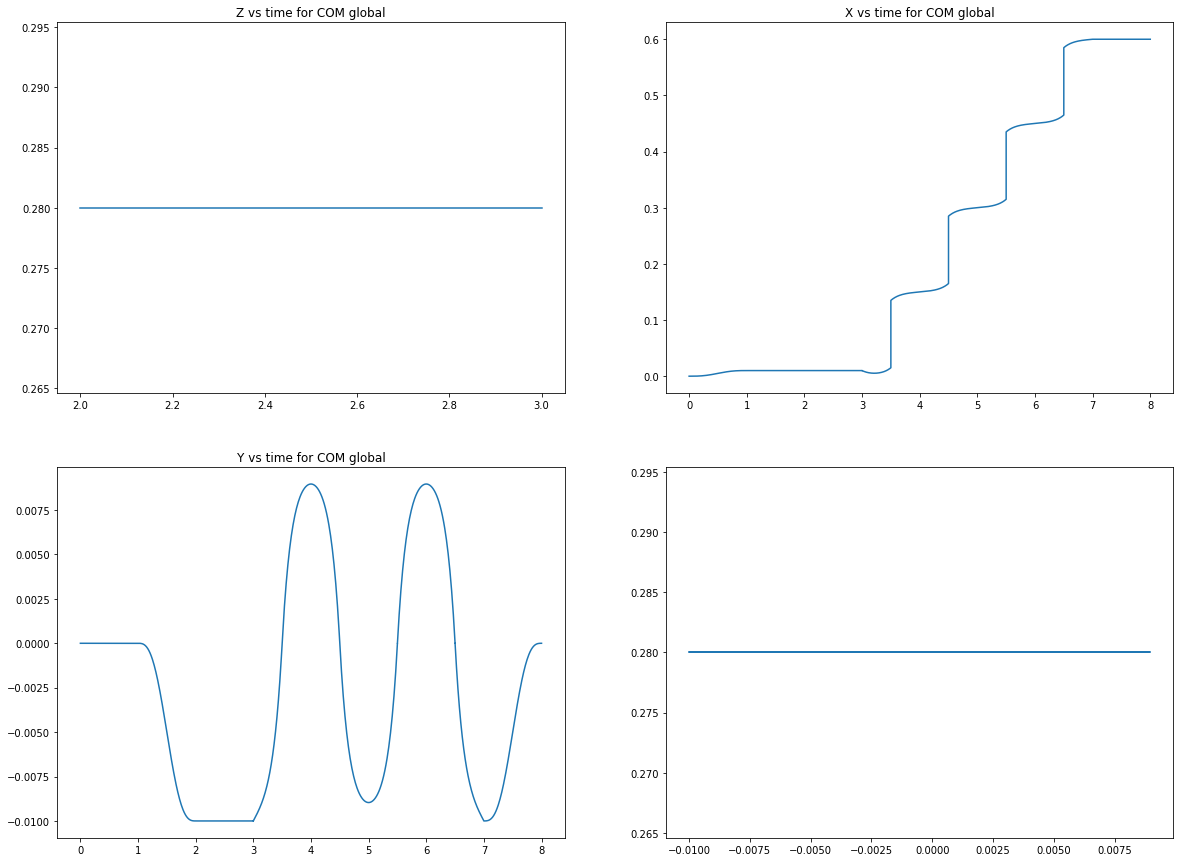

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for swing leg global")
axes[0,0].plot(t_data   , swing_leg_global[2]) 
axes[0,1].set_title("X vs time for swing leg global")
axes[0,1].plot(t_data   , swing_leg_global[0]) 
axes[1,0].set_title("Y vs time for swing leg global")
axes[1,0].plot(t_data   , swing_leg_global[2]) 
axes[1,1].plot( swing_leg_global[1]  , swing_leg_global[2]) 

plt.show()


fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for COM global")
axes[0,0].plot(t_data[202:303]   , com_global[2][202:303]) 
axes[0,1].set_title("X vs time for COM global")
axes[0,1].plot(t_data   , com_global[0]) 
axes[1,0].set_title("Y vs time for COM global")
axes[1,0].plot(t_data   , com_global[1]) 
axes[1,1].plot(com_global[1]  , com_global[2]) 
plt.show()



In [ ]:
!pip install celluloid

In [ ]:
# simulating combined motion
def plotc(ordinate_data ):
        import matplotlib.pyplot as plt
        from celluloid import Camera
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        camera = Camera(fig)
        axis = plt.axes(projection='3d')
        axis = Axes3D(fig)
       
        axis.set_xlabel('$X$')
        axis.set_ylabel('$Y$')
        axis.set_zlabel('$Z$')
        axis.set_title("3D simulation")
  
        line1, = axis.plot([], [],[], lw = 3,color='orange')  
        line2, = axis.plot([], [],[], lw = 3,color='orange')  

       
    

        for i in range(len(ordinate_data)):

            if i % 50 == 0 :
                print(i)

            points = ordinate_data[i]
            r = axis.plot3D( [points[0][0]] , [ points[0][1] ] , [ points[0][2] ] , 'b.')
            line1 = axis.plot([points[0][0],points[1][0]], [points[0][1],points[1][1]],[points[0][2],points[1][2]], lw = 1, color='orange') 
            line2 = axis.plot([points[0][0],points[2][0]], [points[0][1],points[2][1]],[points[0][2],points[2][2]], lw = 1, color='orange') 
                       
            camera.snap()

        animation = camera.animate(interval = 20, repeat = False)
                          
        animation.save("Multistep_3D" + '.gif' , writer='pillow')


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900


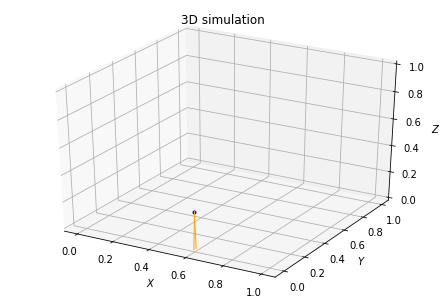

In [ ]:
 plotc(ordinate_data )

In [ ]:
def plot_2d_top( ordinate_data):

        import matplotlib.pyplot as plt
        from matplotlib.animation import FuncAnimation 
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib.animation import PillowWriter
        fig = plt.figure()
        # axis = plt.axes(projection='3d')
        # axis = Axes3D(fig)
        axis = plt.axes()
        axis.set_xlabel('$X$')
        axis.set_ylabel('$Y$')
        axis.set_title("Top view")
        line1, = axis.plot([], [], lw = 3  ,color='orange',label='Swing foot')  
        line2, = axis.plot([], [], lw = 3 ,color='orange',label='Fixed foot')  
        
        

        def animate(i): 
            if i % 50 == 0 :
                print(i)

            points = ordinate_data[i]
            r = axis.plot( [points[0][0]] , [ points[0][1] ]  , 'b.')
            line2.set_data([points[0][0],points[1][0]], [points[0][1],points[1][1]]) 
            line1.set_data([points[0][0],points[2][0]], [points[0][1],points[2][1]])
            
            return line1, line2  
   
        anim = FuncAnimation(fig, animate, init_func = None, 
                     frames = len(ordinate_data), interval = 200, blit = True) 
        writergif = PillowWriter(fps=30) 
        anim.save("2d_top_view.gif", writer=writergif)

In [ ]:
# plot_2d_top( ordinate_data)

In [ ]:
def plot_2d_side( ordinate_data):

        import matplotlib.pyplot as plt
        from matplotlib.animation import FuncAnimation 
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib.animation import PillowWriter
        fig = plt.figure()
        # axis = plt.axes(projection='3d')
        # axis = Axes3D(fig)
        axis = plt.axes()
        axis.set_xlabel('$X$')
        axis.set_ylabel('$Z$')
        axis.set_title("Side view")
        line1, = axis.plot([], [], lw = 3  ,color='orange',label='Swing foot')  
        line2, = axis.plot([], [], lw = 3 ,color='orange',label='Fixed foot')  
        r = axis.plot( 0 , 0  , 'b.')
        

        def animate(i): 
            if i % 50 == 0 :
                print(i)

            points = ordinate_data[i]
            r = axis.plot( [points[0][0]] , [ points[0][2] ]  , 'b.')
            line2.set_data([points[0][0],points[1][0]], [points[0][2],points[1][2]]) 
            line1.set_data([points[0][0],points[2][0]], [points[0][2],points[2][2]])
            
            return line1, line2  
   
        anim = FuncAnimation(fig, animate, init_func = None, 
                     frames = len(ordinate_data), interval = 200, blit = True) 
        writergif = PillowWriter(fps=30) 
        anim.save("2d_side_view.gif", writer=writergif)

In [ ]:
# plot_2d_side( ordinate_data)

# Inverse Kinematics

In [ ]:
## shifting clobal data to the com co ordinate axis

In [ ]:
def com_frame(ordinate_data):

    oc_data = []
    sl_com , fl_com = [[],[],[]] , [[],[],[]]
    for i in range(len(ordinate_data)):
        points = ordinate_data[i]
        oc_data.append((
            (0  ,  0 ,    0) , # com which is zero
            ( points[0][0] - points[1][0] , points[0][1] - points[1][1] , points[0][2] - points[1][2]   ) ,# swing leg
            ( points[0][0] - points[2][0] , points[0][1] - points[2][1] , points[0][2] - points[2][2]   )
        ) )

        sl_com[0].append(points[0][0] - points[1][0])
        sl_com[1].append(points[0][1] - points[1][1])
        sl_com[2].append(points[0][2] - points[1][2])

        fl_com[0].append(points[0][0] - points[2][0])
        fl_com[1].append(points[0][1] - points[2][1])
        fl_com[2].append(points[0][2] - points[2][2])



    return oc_data , sl_com , fl_com 

oc_data , sl_com , fl_com  = com_frame(ordinate_data)


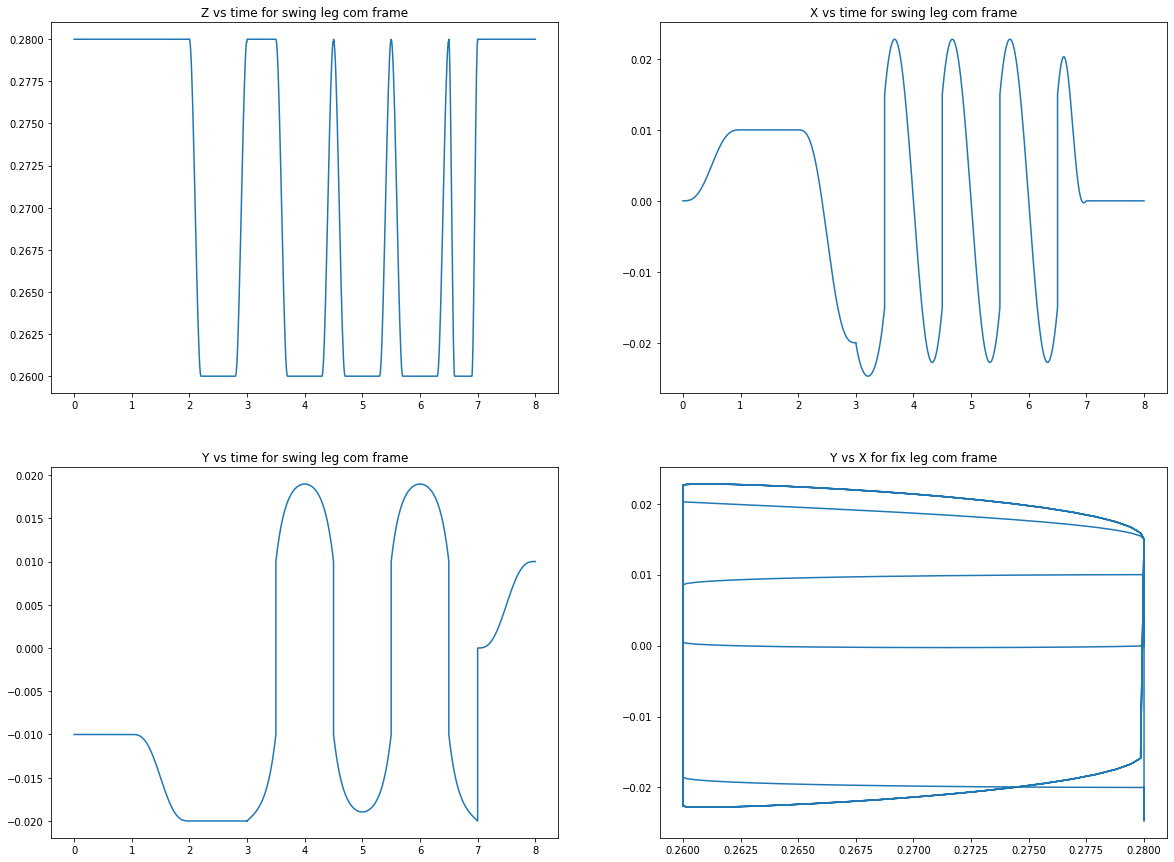

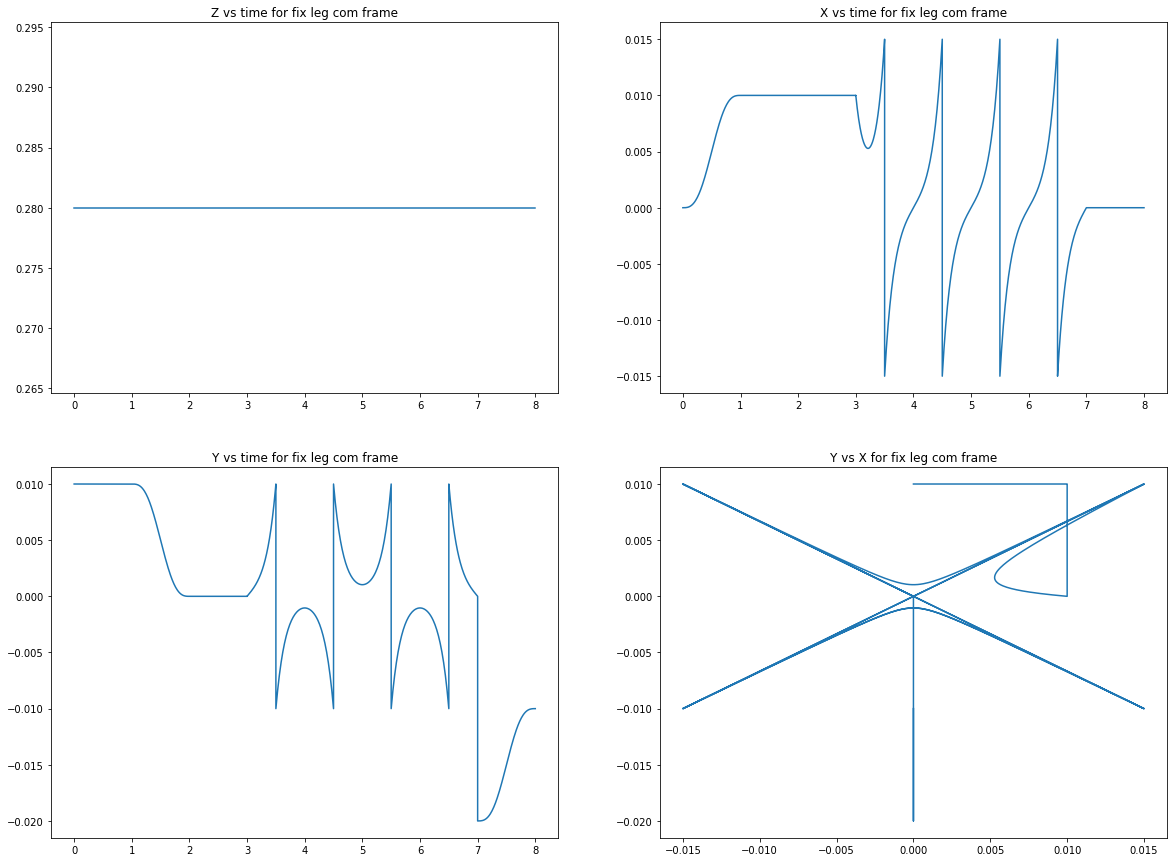

100

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for swing leg com frame")
axes[0,0].plot(t_data   , sl_com[2]) 
axes[0,1].set_title("X vs time for swing leg com frame")
axes[0,1].plot(t_data   , sl_com[0]) 
axes[1,0].set_title("Y vs time for swing leg com frame")
axes[1,0].plot(t_data   , sl_com[1]) 
axes[1,1].set_title("Y vs X for fix leg com frame")
axes[1,1].plot(sl_com[2]   , sl_com[0]) 
plt.show()

fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for fix leg com frame")
axes[0,0].plot(t_data   , fl_com[2]) 
axes[0,1].set_title("X vs time for fix leg com frame")
axes[0,1].plot(t_data   , fl_com[0]) 
axes[1,0].set_title("Y vs time for fix leg com frame")
axes[1,0].plot(t_data   , fl_com[1]) 
axes[1,1].set_title("Y vs X for fix leg com frame")
axes[1,1].plot(fl_com[0]   , fl_com[1]) 
plt.show()

len( fl_com[0][:100])

In [ ]:
import sympy as sy


theta1 = sy.symbols('theta_1')
theta2 = sy.symbols('theta_2')
theta3 = sy.symbols('theta_3')



link_1 = sy.Symbol('L1')
link_2 = sy.Symbol('L2')
link_3 = sy.Symbol('L3')



In [ ]:
pi = sy.pi
d_h_para = [ #d  theta  , a,    , alpha
            [0 ,  pi/2  ,  0     ,  1*pi/2 ],
            [0 , theta1 , 0      ,     0   ],
            [0 , -1*theta2 , link_1 ,     0   ],
            [0 , theta3 , link_2 , -1*pi/2 ],
            [0 ,      0 , link_3 ,     0   ],
]
print(d_h_para)

[[0, pi/2, 0, pi/2], [0, theta_1, 0, 0], [0, -theta_2, L1, 0], [0, theta_3, L2, -pi/2], [0, 0, L3, 0]]


In [ ]:
 import sympy as sy
 def sym_transform(lst):
        d , theta,a ,alpha = lst
#         alpha , theta = m.radians(alpha) , m.radians(theta)
        T = sy.Matrix([ [ sy.cos(theta)              , -1*sy.sin(theta)           ,      0          ,    a              ],
                        [ sy.sin(theta)*sy.cos(alpha) , sy.cos(theta)*sy.cos(alpha) , -1*sy.sin(alpha) , -1*sy.sin(alpha)*d ],
                        [ sy.sin(theta)*sy.sin(alpha) , sy.cos(theta)*sy.sin(alpha) ,    sy.cos(alpha) ,    sy.cos(alpha)*d ],
                        [ 0                         , 0                         ,    0            ,  1                ]])
        return T

In [ ]:
T = 1

for i in d_h_para :
    T = T * sym_transform(i)
    print(T[:,3])

Matrix([[0], [0], [0], [1]])
Matrix([[0], [0], [0], [1]])
Matrix([[-L1*sin(theta_1)], [0], [L1*cos(theta_1)], [1]])
Matrix([[-L1*sin(theta_1) + L2*(-sin(theta_1)*cos(theta_2) + sin(theta_2)*cos(theta_1))], [0], [L1*cos(theta_1) + L2*(sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2))], [1]])
Matrix([[-L1*sin(theta_1) + L2*(-sin(theta_1)*cos(theta_2) + sin(theta_2)*cos(theta_1)) + L3*(-sin(theta_1)*cos(theta_2) + sin(theta_2)*cos(theta_1))*cos(theta_3)], [L3*sin(theta_3)], [L1*cos(theta_1) + L2*(sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2)) + L3*(sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2))*cos(theta_3)], [1]])


In [ ]:
T[: ,3]

Matrix([
[-L1*sin(theta_1) + L2*(-sin(theta_1)*cos(theta_2) + sin(theta_2)*cos(theta_1)) + L3*(-sin(theta_1)*cos(theta_2) + sin(theta_2)*cos(theta_1))*cos(theta_3)],
[                                                                                                                                          L3*sin(theta_3)],
[   L1*cos(theta_1) + L2*(sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2)) + L3*(sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2))*cos(theta_3)],
[                                                                                                                                                        1]])

In [ ]:
sy.simplify(T[:,3][0])

-L1*sin(theta_1) - L2*sin(theta_1 - theta_2) - L3*sin(theta_1 - theta_2)*cos(theta_3)

In [ ]:
sy.simplify(T[:,3][1])

L3*sin(theta_3)

In [ ]:
sy.simplify(T[:,3][2])

L1*cos(theta_1) + L2*cos(theta_1 - theta_2) + L3*cos(theta_3)*cos(theta_1 - theta_2)

In [ ]:
values = { link_1:1,link_2:1 ,link_3:1,theta1:0,theta2:0,theta3:0 }
position_end_effector = T[:3,3]
list(position_end_effector.subs(values))

[0, 0, 3]

In [ ]:
# position_end_effector = T[:3,3]
# position_end_effector = [ position_end_effector[2] , position_end_effector[1] , position_end_effector[0]]
# x_data ,y_data ,z_data = [] , [] ,[]
# values = { link_1:1,link_2:1 ,link_3:1,theta1:0,theta2:0,theta3:0 }
# x = sy.Symbol('x')
# y = sy.Symbol('y')
# z = sy.Symbol('z')
def cosign(a,b,c):
    import math as m
    return m.acos( ( (b**2) + (c**2) - (a**2))/(2*b*c)   )

def inverse(lst , link_lengths=[1,1,1] ):
    import math as m
    l1 , l2 , l3 = link_lengths
    x ,y , z = lst

    theta3 = m.asin(y/l3)

    r = ( x**2 + z**2)**0.5
    # print(r)
    r1 = l2 + l3*m.cos(theta3)
    # print(r1)
    theta1 = cosign( r1,l1,r) - m.atan2( x,z) 

    theta2 =  m.pi - cosign(r,r1,l1)

    return [theta1,theta2,theta3]


In [ ]:

def cal_inverse(oc_data , link_lengths):
    q_sl = []
    q_fl = []
    i = 0 
    q = np.array([0.1,0.1,0.1]).T
    for points in oc_data:
        q = inverse(points[1],link_lengths )
        q_sl.append(q)
        q = inverse(points[2],link_lengths)
        q_fl.append(q)
        q = np.array([0.1,0.1,0.1]).T
        # print(i)
        i += 1

    return q_sl , q_fl



In [ ]:
link_lengths = [ 0.088*2 , 0.088 , 0.088]
q_sl , q_fl = cal_inverse(oc_data , link_lengths)

In [ ]:
t1,t2,t3 = q_sl[300]

In [ ]:
def check( t1,t2,t3):
    values = { link_1:0.088*2,link_2:0.088 ,link_3:0.088,theta1:t1,theta2:t2,theta3:t3 }
    position_end_effector = T[:3,3]
    return list(position_end_effector.subs(values))

check(t1,t2,t3)

[-0.0199984221096634, -0.0200000000000000, 0.279440000000000]

In [ ]:
oc_data[300]

((0, 0, 0),
 (-0.019998422109663502, -0.02, 0.2794400000000001),
 (0.01, 0.0, 0.28))

In [ ]:
t1,t2,t3 = inverse((0.01, 0.0, 0.28),link_lengths )

check(t1,t2,t3) , t1,t2,t3

([0.00999999999999997, 0, 0.280000000000000],
 0.61450263237608,
 1.300403490110808,
 0.0)

In [ ]:
import csv 

joints = [ 'l1' ,'l2' ,'l3' ,'r1' ,'r2','r3']

In [ ]:
angles = []
i = 0
for j in  swing_leg_global[1] :
    a = [q_sl[i][0] ,q_sl[i][1] , q_sl[i][2] , q_fl[i][0] ,q_fl[i][1] , q_fl[i][2] ]

    for k in range(6):
        a[k] = m.atan2( m.sin(a[k]) , m.cos(a[k]))

    if j == 0.1 :
        angles.append(  [a[0] ,a[1 ] ,a[2],a[3],a[4],a[5]])

    else :
        angles.append( [a[3],a[4],a[5] ,a[0] ,a[1 ] ,a[2]]  )

    i += 1


In [ ]:
import csv 
Details =[ 'l1' ,'l2' ,'l3' ,'r1' ,'r2','r3']
rows = angles
with open('angles.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(Details) 
    write.writerows(rows) 

In [ ]:
# # initializing the titles and rows list
# fields = []
# rows = []
  
# # reading csv file
# with open('angles.csv', 'r') as csvfile:
#     # creating a csv reader object
#     csvreader = csv.reader(csvfile)
      
#     # extracting field names through first row
#     fields = next(csvreader)
  
#     # extracting each data row one by one
#     for row in csvreader:
#         rows.append(row)
  
#     # get total number of rows
#     print("Total no. of rows: %d"%(csvreader.line_num))

In [ ]:
len(oc_data)

909

In [ ]:
def cosign(a,b,c):
    import math as m
    return m.acos( ( (b**2) + (c**2) - (a**2))/(2*b*c)   )

def inverse(lst , link_lengths=[1,1] ):
    import math as m
    l1 , l2  = link_lengths
    x  ,y, z = lst

    r = ( x**2 + z**2)**0.5
    phi = m.atan(x/z)
    
    theta1 = cosign( l2,l1,r) + phi

    theta2 =  m.pi - cosign(r,l2,l1)

    return [theta1,theta2]



In [ ]:
def cal_inverse(oc_data , link_lengths):
    q_sl = []
    q_fl = []
    i = 0 
    q = np.array([0.1,0.1,0.1]).T
    for points in oc_data:
        q = inverse(points[1],link_lengths )
        q_sl.append(q)
        q = inverse(points[2],link_lengths)
        q_fl.append(q)
        
        # print(i)
        i += 1

    return q_sl , q_fl

link_lengths=[1,1] 
q_sl , q_fl = cal_inverse(oc_data , link_lengths)
